## Final Project Submission

Please fill out:
* Student name: **Carly McMullen**
* Student pace: **self paced**
* Scheduled project review date/time: **01 June 2020/1000**
* Instructor name: **Jeff Herman** 
* Blog post URL: 


## Preprocessing ##

In [1]:
#importing all necessary programs 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#import and preview information
df = pd.read_csv('kc_house_data.csv')
print(df.shape)
df.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### 1.A Dealing with missing data ####

In [3]:
#checking for missing data 
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
#I am assuming that both 0 and NaN mean that there is no waterfront.
#I am aware that this could potentially simply mean there is no information regarding this
df.waterfront = df.waterfront.fillna(0.0)
df.waterfront.unique()

array([0., 1.])

In [5]:
#this seems like a value scale rating the view? 
#there are 63 missing values, I will choose to replace this with the median 
df.view.unique()
df.view = df.view.fillna(df.view.median())

In [6]:
#0 is already used to denote that the renovation did not occur. Will fill nan w/ 0.
df.yr_renovated.unique()
df.yr_renovated = df.yr_renovated.fillna(0.0)

In [7]:
#double checking that we've dealt with all missing data. 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### 1.B Dealing with encoding ####

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
#immediately I notice the sqft in the basement is listed as an object, let's switch that to a float
df.sqft_basement.unique()
#there's a pesky '?' in there, let's replace that with 0. 
df.sqft_basement = df['sqft_basement'].str.replace('?','0.0')
df.sqft_basement = df.sqft_basement.astype(float)

In [10]:
#the date is important, but what about it? 
#month/year most important, let's make those useable. 
df['date'] = pd.to_datetime(df['date'],format='%m/%d/%Y')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [11]:
years = []
for x in range(len(df)):
    years.append(df['date'][x].year)
df['year_sold']=years

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015


In [12]:
months = []
for x in range(len(df)):
    months.append(df['date'][x].month)
df['month_sold'] = months 

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2


In [13]:
#now that I've extracted the data from the date column I needed, let's drop it
df=df.drop(['date'], axis=1)

In [14]:
#double checking to make sure this looks right 
#it does! It now has 21 columns (23columns - date and id).
df.head(20)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,5
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,2014,6
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,2015,1
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,2015,4
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,2015,3


In [15]:
#thinking about the items that would be one-hot-encoded, and need to change them to strings
#these items are waterfront, yr_built, yr_renovated, years, months, and zipcode

In [16]:
cat_feats = ['waterfront','yr_built','yr_renovated','zipcode','year_sold','month_sold']
for feat in cat_feats:
    df[feat] = df[feat].astype('str')

In [17]:
#Making sure all the datatypes are as planned
df.info()
#They are!
#Looking at the data so far, I'd like to drop a few columns that I think won't be useful already.
#Zip code: zip codes were originally designed to help with postal routes and don't always accurately describe location
#We will use lat/long for geospatial positioning
#Id - just not necessarily as an identifier 
df = df.drop(['id','zipcode'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null object
yr_renovated     21597 non-null object
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
year_sold        21597 non-null object
month_sold       21597 non-null object
dtypes: float64(7), int64(9), objec

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null object
yr_renovated     21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
year_sold        21597 non-null object
month_sold       21597 non-null object
dtypes: float64(7), int64(8), object(5)
memory usage: 3.3+ MB


In [19]:
lot_counter = 0
for x in range(len(df)):
    if df['sqft_lot'][x] / df['sqft_lot15'][x] == 1:
        lot_counter += 1
    else:
        continue
print(lot_counter)

living_counter = 0
for x in range(len(df)):
    if df['sqft_living'][x]/df['sqft_living15'][x] ==1:
        living_counter += 1
    else:
        continue
print(living_counter)

4474
2563


In [20]:
print("Sqft Living and Sqft Living15 are the same {}% of the time.".format(living_counter/(len(df))))
print("Sqft Lot and Sqft Lot15 are the same {}% of the time.".format(lot_counter/len(df)))

Sqft Living and Sqft Living15 are the same 0.11867388989211465% of the time.
Sqft Lot and Sqft Lot15 are the same 0.207158401629856% of the time.


In [21]:
#upon further research it appears that sqft_living/lot15 are the average of the 15 closest properties 
#both will remain. 

#### Categorical Features ####

In [22]:
#starting to think about getting dummy values, let's look at the cat feats
cat_feats = ['waterfront','yr_built','yr_renovated','year_sold','month_sold']
for feat in cat_feats:
    print(df[feat].value_counts())

0.0    21451
1.0      146
Name: waterfront, dtype: int64
2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64
0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1951.0        1
1959.0        1
1946.0        1
1948.0        1
1976.0        1
Name: yr_renovated, Length: 70, dtype: int64
2014    14622
2015     6975
Name: year_sold, dtype: int64
5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month_sold, dtype: int64


In [23]:
#to avoid having over 200 dummy categories I'll bin yr_built and yr_renovated into decades. 
df['yr_built']=pd.to_numeric(df.yr_built)
df.yr_built.min()
type(df.yr_built[1])

numpy.int64

In [24]:
bins = [1900,1910,1920,1930,1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = [0,1,2,3,4,5,6,7,8,9,10,11]
df['year_built'] = pd.cut(df['yr_built'], bins=bins, labels=labels)
df=df.drop(['yr_built'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,year_built
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,0.0,47.5112,-122.257,1340,5650,2014,10,5
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1991.0,47.7210,-122.319,1690,7639,2014,12,5
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,0.0,47.7379,-122.233,2720,8062,2015,2,3
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,0.0,47.5208,-122.393,1360,5000,2014,12,6
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,0.0,47.6168,-122.045,1800,7503,2015,2,8


In [25]:
#to keep the labels consistent w/ year built I will replace all the 0 values with 2025
#this way the label 12 means it was not renovated
df['yr_renovated']=pd.to_numeric(df.yr_renovated)
df['yr_renovated'] = df['yr_renovated'].replace(0.0, 2025)

In [26]:
bins = [1900,1910,1920,1930,1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12]
df['year_renovated'] = pd.cut(df['yr_renovated'], bins=bins, labels=labels)
df=df.drop(['yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,year_built,year_renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,47.5112,-122.257,1340,5650,2014,10,5,12
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,47.7210,-122.319,1690,7639,2014,12,5,9
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,47.7379,-122.233,2720,8062,2015,2,3,12
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,47.5208,-122.393,1360,5000,2014,12,6,12
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,47.6168,-122.045,1800,7503,2015,2,8,12


In [27]:
df.info()
#Great! All my categorical data is binned 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null object
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null float64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
year_sold         21597 non-null object
month_sold        21597 non-null object
year_built        21510 non-null category
year_renovated    21597 non-null category
dtypes: category(2), float64(7), int64(8), object(3)
memory usage: 3.0+ MB


#### Dealing with coordinates ####

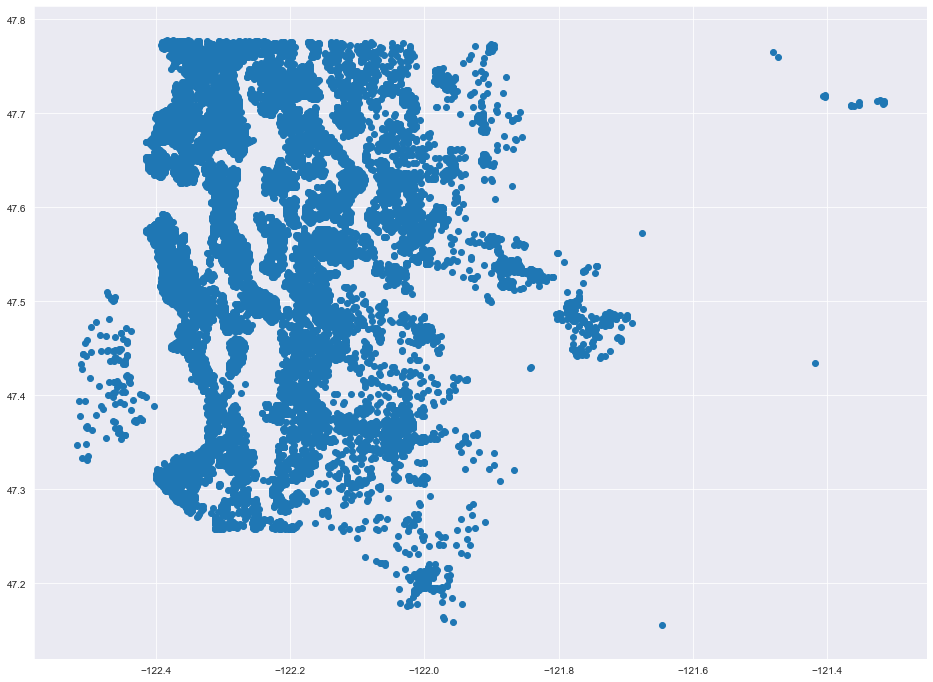

In [28]:
#first, let's visualize the data. 
plt.figure(figsize=(16,12))
plt.scatter(df['long'], df['lat'])

In [29]:
#Kmeans clustering doesn't learn how many clusters(k) to make from the data
#I will use the elbow method to estimate how many clusters (k) to utilize 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# I need to standardize my numerical data anyways so let's go ahead with that.

cat_feats = ['waterfront','year_built','year_renovated','year_sold','month_sold']
num_feats = df.columns.drop(cat_feats)
sc = StandardScaler()

lat_long_scaled = sc.fit_transform(df[['lat','long']])


In [30]:
km = KMeans(n_clusters=5)
km.fit(lat_long_scaled)
print(km.inertia_)

km = KMeans(n_clusters=10)
km.fit(lat_long_scaled)
print(km.inertia_)


10242.520191911462
4433.12576629351


Text(0, 0.5, 'Sum of squared distance')

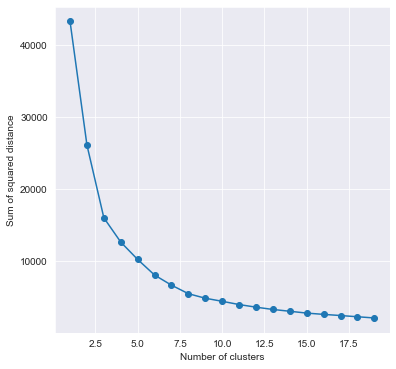

In [31]:
#back to the elbow method
sse = []
possible_ks = list(range(1,20))

for k in possible_ks:
    km = KMeans(n_clusters = k)
    km.fit(lat_long_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(6,6))
plt.plot(possible_ks, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
#let's go with 7 cluisters

Text(0.5, 1.0, 'Clustered latitude & longitude')

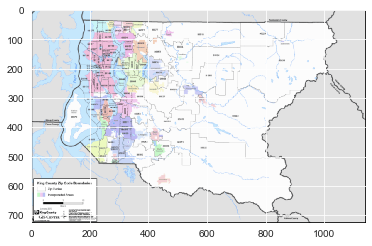

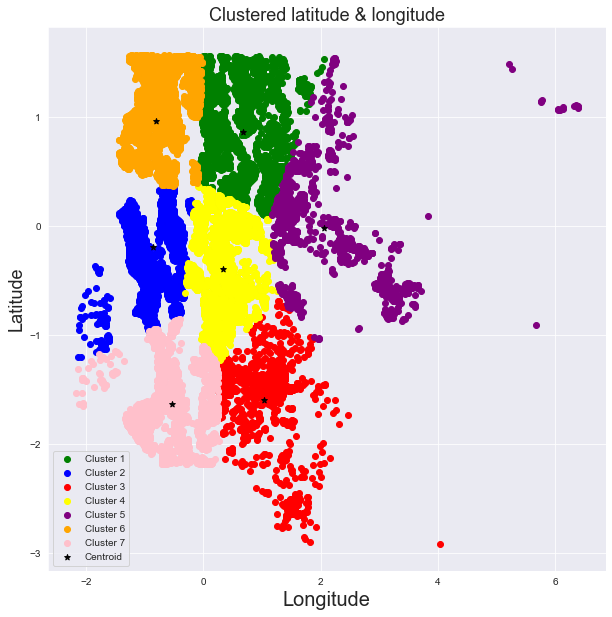

In [32]:
km = KMeans(n_clusters = 7)
km.fit(lat_long_scaled)
centroids = km.cluster_centers_

colors = ['green','blue','red','yellow','purple','orange','pink']

im = plt.imread('King_County.png')
implot = plt.imshow(im)

fig, ax = plt.subplots(figsize=(10,10))
for x,y in enumerate(list(range(1,8))):
    plt.scatter(lat_long_scaled[km.labels_ == x,1], lat_long_scaled[km.labels_ == x,0],
            c= colors[x], label=(f'Cluster {y}'))

plt.scatter(centroids[:,1], centroids[:,0], marker = '*', c='black', label='Centroid')


plt.legend()
plt.xlabel('Longitude', fontsize = 20)
plt.ylabel('Latitude', fontsize=18)
plt.title('Clustered latitude & longitude', fontsize=18)


In [33]:
#Adding the geospatial cluster labels to the df
df['Geo_Clusters']= km.labels_

<function matplotlib.pyplot.legend(*args, **kwargs)>

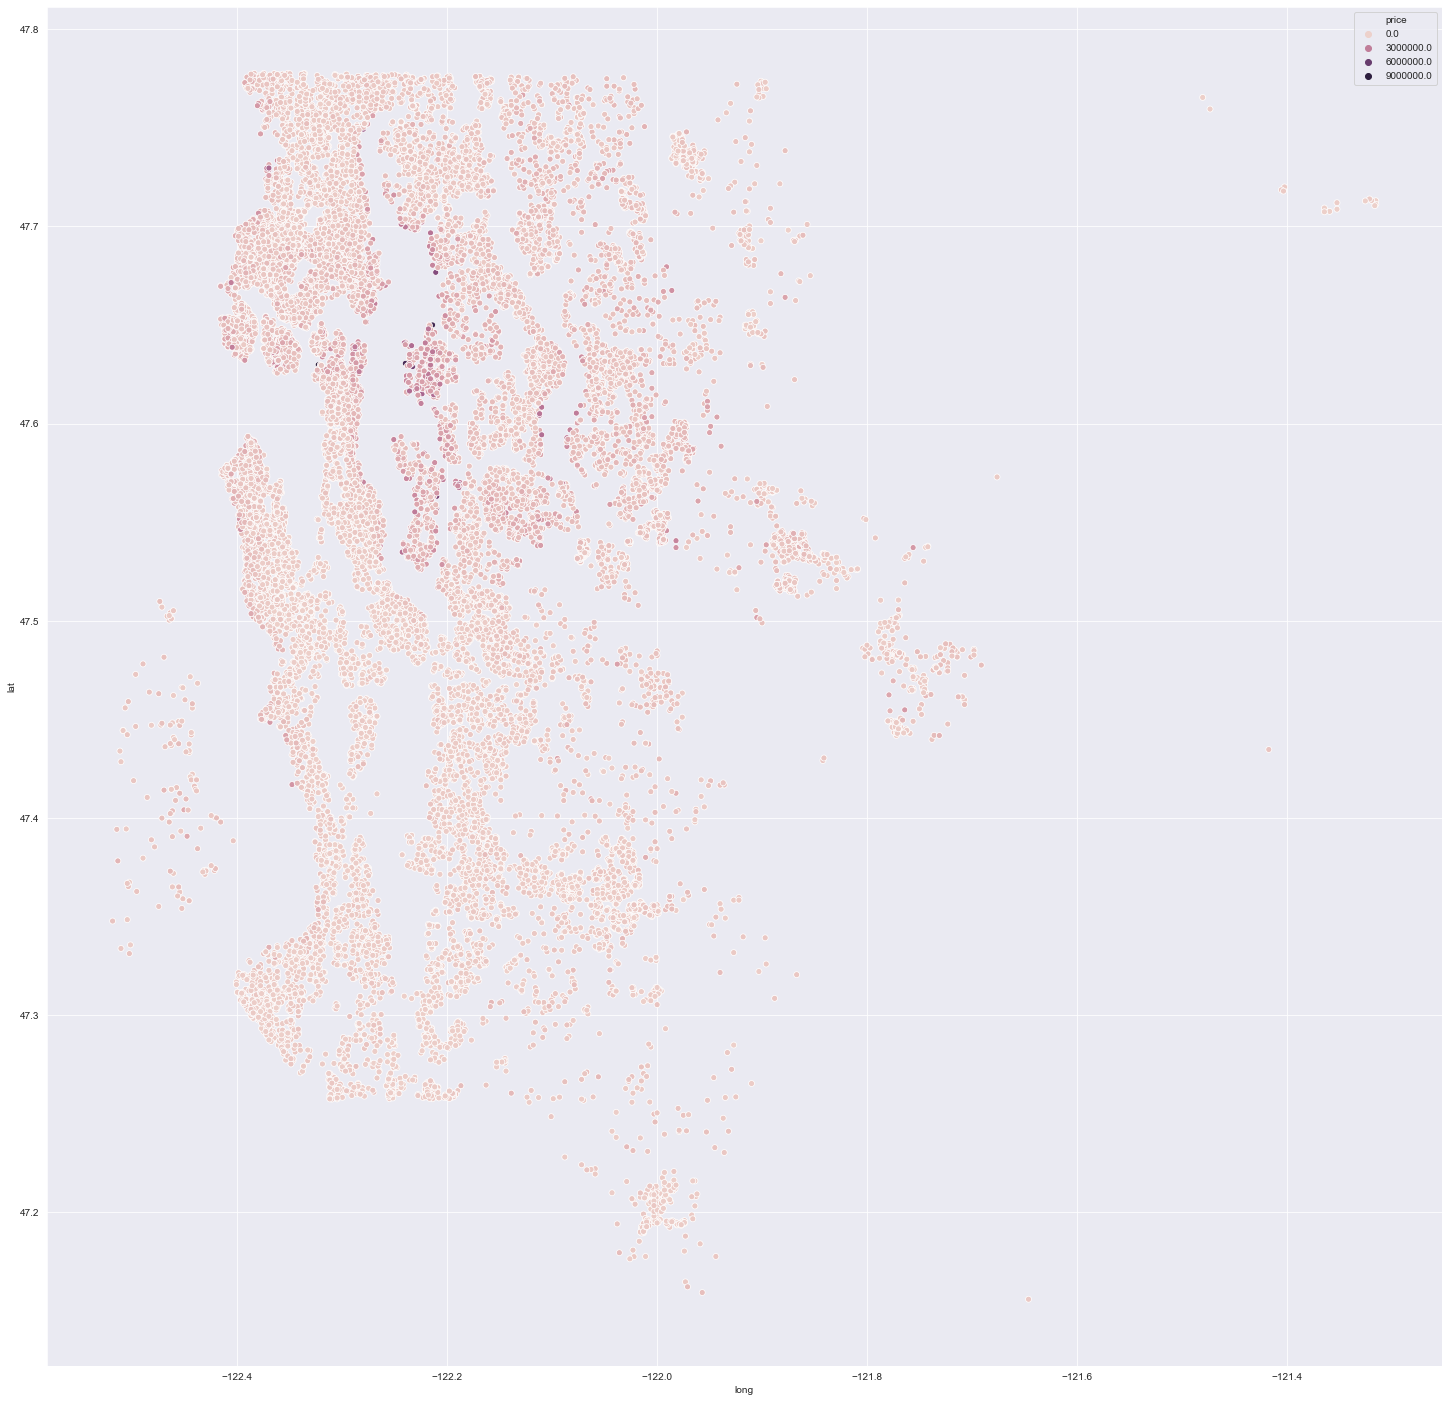

In [48]:
fig = plt.figure(figsize=(25,25))
palette=sns.set_palette(palette='bright')

sns.scatterplot(x=df.long, y=df.lat, hue=df['price'], ci=None, palette=palette)

plt.legend

In [35]:
#dropping the raw lat/long data
df = df.drop(['lat','long'], axis=1),hh

NameError: name 'hh' is not defined

In [ ]:
#changing Geo_clusters to categorical data 
df['Geo_Clusters'] = df['Geo_Clusters'].astype('str')

In [ ]:
df.info()

In [ ]:
df.to_csv('./data/preprocessing.csv')